# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
#imported packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as smf

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
#prints the data1 dataset
data1

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240
...,...,...,...
95,95,98,285
96,96,9,18
97,97,56,174
98,98,50,159


In [3]:
#prints the data2 dataset
data2

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560
...,...,...,...,...
95,95,98,B,9615
96,96,9,A,1066
97,97,56,A,4139
98,98,50,B,2502


# For data1

In [4]:
data1 = data1.drop('Unnamed: 0', axis=1)
data1

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240
...,...,...
95,98,285
96,9,18
97,56,174
98,50,159


In [5]:
data2 = data2.drop('Unnamed: 0', axis=1)
data2

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560
...,...,...,...
95,98,B,9615
96,9,A,1066
97,56,A,4139
98,50,B,2502


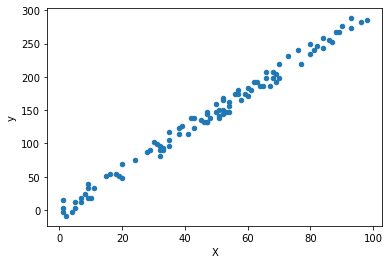

In [6]:
data1.plot.scatter(x='X', y='y')
plt.show()

In [7]:
X = np.array(data1['X']).reshape(-1,1)
y = np.array(data1['y']).reshape(-1,1)
X.shape, y.shape

((100, 1), (100, 1))

In [8]:
from numpy.linalg import inv

const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)

# first 10 examples
mat[:10,:]

array([[ 1., 50.],
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 35.],
       [ 1., 81.],
       [ 1., 57.],
       [ 1., 70.],
       [ 1., 73.],
       [ 1., 52.],
       [ 1., 57.]])

In [9]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: -1.789
Beta 1: 3.005


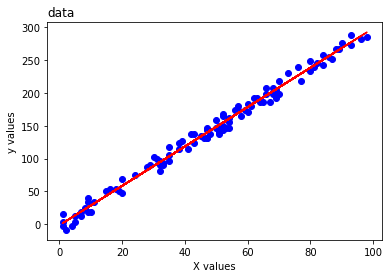

In [10]:
yhat = mat.dot(betas)

plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('data', loc='left')
plt.show()

# evaluating residual plots for data1

In [11]:
residual = y - yhat
residual

array([[ -1.48276912],
       [  1.34335352],
       [ 10.4302922 ],
       [  1.59873589],
       [ -1.65121281],
       [ 10.47919521],
       [-10.59144247],
       [ 13.39225653],
       [ 10.50636355],
       [  4.47919521],
       [ -7.43386611],
       [ -7.40126411],
       [-13.3849631 ],
       [ -4.58057513],
       [ -4.21651941],
       [-13.23282041],
       [  4.53353188],
       [ -7.56427413],
       [ 13.56070022],
       [ -1.67838115],
       [ 13.78348059],
       [ 10.58243489],
       [ 13.74001125],
       [  4.4465932 ],
       [-10.48820279],
       [-13.22195308],
       [ -1.23825408],
       [  7.33248618],
       [  1.4302922 ],
       [ -4.46103445],
       [-10.49363645],
       [ -1.48820279],
       [ -4.44473345],
       [ 13.50636355],
       [ -4.73271783],
       [  4.63677157],
       [  1.49549621],
       [  7.53353188],
       [ -7.53710579],
       [-10.23825408],
       [  4.41942487],
       [ -4.50450379],
       [ -7.39039677],
       [ -7

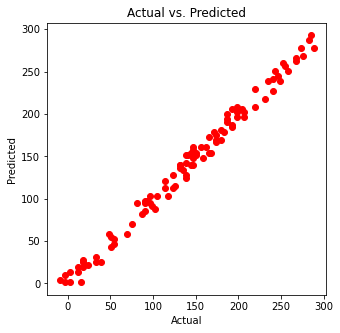

In [12]:
plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

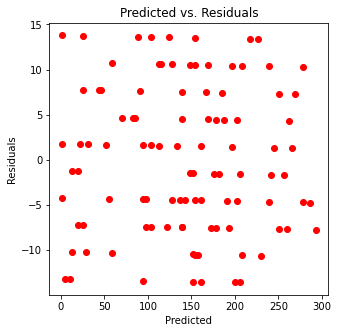

In [13]:
plt.figure(figsize=(5,5))
plt.plot(yhat, residual, 'ro')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

In [14]:
simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9151.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.37e-98
Time:                        20:55:48   Log-Likelihood:                -351.20
No. Observations:                 100   AIC:                             706.4
Df Residuals:                      98   BIC:                             711.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7889      1.707     -1.048      0.2

# for data2

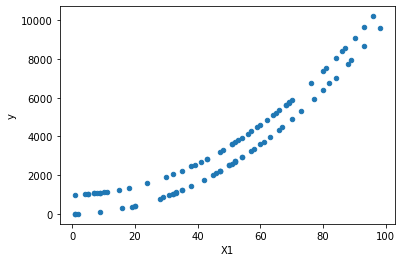

In [15]:
data2.plot.scatter(x='X1', y='y')
plt.show()

In [16]:
X = np.array(data2['X1']).reshape(-1,1)
y = np.array(data2['y']).reshape(-1,1)
X.shape, y.shape

((100, 1), (100, 1))

In [17]:
from numpy.linalg import inv

const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)

# first 10 examples
mat[:10,:]

array([[ 1., 50.],
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 35.],
       [ 1., 81.],
       [ 1., 57.],
       [ 1., 70.],
       [ 1., 73.],
       [ 1., 52.],
       [ 1., 57.]])

In [18]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: -942.689
Beta 1: 92.405


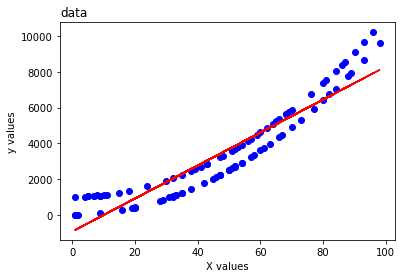

In [19]:
yhat = mat.dot(betas)

plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('data', loc='left')
plt.show()

In [20]:
residual = y - yhat
residual

array([[-1167.57229043],
       [  103.46035055],
       [ -801.05596994],
       [  -66.49384089],
       [ 1017.86558052],
       [-1070.40890021],
       [ -613.67688982],
       [ -486.89257972],
       [ -167.38275037],
       [  -70.40890021],
       [ -157.9252207 ],
       [-1063.49384089],
       [ -993.27815098],
       [  293.13357012],
       [ 1839.28397807],
       [ 1582.06828816],
       [-1196.35660052],
       [  158.34926003],
       [-1176.33045067],
       [ 1397.83943067],
       [  837.28397807],
       [ -118.7095308 ],
       [  202.04213832],
       [ -923.84028003],
       [ -183.9775204 ],
       [  765.8787481 ],
       [ 1515.66305819],
       [  224.64989061],
       [  196.94403006],
       [-1206.95137055],
       [-1159.38275037],
       [ -170.9775204 ],
       [ -196.73568064],
       [-1151.38275037],
       [ 2289.78713098],
       [ -867.6572311 ],
       [-1130.19321031],
       [-1180.35660052],
       [ -994.62459012],
       [ 1510.66305819],


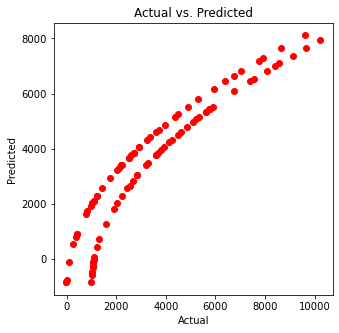

In [21]:
plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

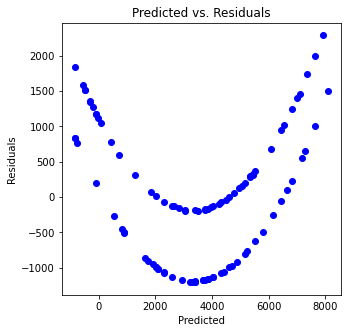

In [22]:
plt.figure(figsize=(5,5))
plt.plot(yhat, residual, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

In [38]:
simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     659.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.60e-45
Time:                        20:56:39   Log-Likelihood:                -825.29
No. Observations:                 100   AIC:                             1655.
Df Residuals:                      98   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -942.6892    195.449     -4.823      0.0

# splitting the data into Training and test

In [23]:
#splitting the data2 dataset into 2 separate datasets X and y
X=data2.drop(columns='X2',axis=1)
y=data2['y']

In [24]:
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [25]:
#prints the X_training
X_training

,X1,y
4,81,7560
79,35,1214
96,9,1066
9,57,4254
7,73,5316
...,...,...
95,98,9615
63,48,3293
29,46,2101
85,43,2848


In [26]:
#prints the y_training
y_training

4     7560
79    1214
96    1066
9     4254
7     5316
      ... 
95    9615
63    3293
29    2101
85    2848
61    9644
Name: y, Length: 80, dtype: int64

In [27]:
#prints the shape of X_training
X_training.shape

(80, 2)

In [28]:
#prints the info() of X_training
X_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 4 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      80 non-null     int64
 1   y       80 non-null     int64
dtypes: int64(2)
memory usage: 1.9 KB


In [29]:
#prints y_training
y_training

4     7560
79    1214
96    1066
9     4254
7     5316
      ... 
95    9615
63    3293
29    2101
85    2848
61    9644
Name: y, Length: 80, dtype: int64

In [30]:
# prints count of null values in data2 
data2.isnull().sum()

X1    0
X2    0
y     0
dtype: int64

In [31]:
# imports all  the packages required to perform linear regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [32]:
#import LinearRegression 
from sklearn.linear_model import LinearRegression

In [33]:
#code to perform linear regression model 
model = LinearRegression()
model.fit(X_training,y_training)

LinearRegression()

In [34]:
#prints r_sq
r_sq = model.score(X_test,y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 1.0


In [35]:
#prints intercept
print(f"intercept: {model.intercept_}")

intercept: 4.547473508864641e-13


In [36]:
#prints slope
print(f"slope: {model.coef_}")

slope: [1.20346424e-14 1.00000000e+00]


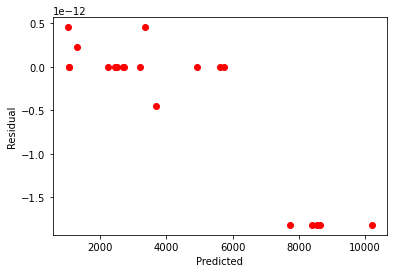

In [37]:
#plot shows the graph between the residual and predicted
predictions = model.predict(X_test)
plt.plot(predictions, predictions- y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

# FINDINGS:

R2 is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data.

1.For the above data,model fits very well which results in a R2 value of 1.

2.we can find only few negative residual values which has very minute differences in range of le-12.

3.The above linear regression model made predictions very accurate in comparison to the actual values.